# Estrategia de Carry

## Autor: Lucía Saiz Lapique

__Examen__

__Gestión de Activos y Carteras__

__CUNEF__

En esta estrategia se tienen en cuenta dos tipos de cambio: el dólar canadiense y la corona
danesa. Además, se coge la cotización de ambas frente al dólar americano, que es el
estándar de mercado. Partimos de la siguiente base: el objetivo de la estrategia es siempre
comprar la moneda que tenga mayor tipo de cambio y vender la que tenga el más bajo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
datos = pd.read_excel('datos_examen.xlsx')
datos = datos.set_index('Date')
observacion = datos.index >= dt.datetime(2015, 5, 1)
datos = datos[(observacion)]
datos.head()

,DOW JONES,Japanese Bond,DKK-EUR X-RATE,CAD-USD X-RATE,DKK DEPOSIT,CAD DEPOSIT,Oro
Date,,,,,,,
2015-05-01,18024.06,147.50,0.1339,0.8226,-0.550,0.955,1178.46
2015-05-04,18070.40,147.50,0.1340,0.8269,0.040,1.260,1188.33
2015-05-05,17928.20,147.50,0.1340,0.8287,-0.235,1.280,1193.34
2015-05-06,17841.98,147.50,0.1339,0.8301,-0.215,1.260,1192.24
2015-05-07,17924.06,146.77,0.1340,0.8245,-0.550,0.955,1184.51


In [3]:
datos_carry = datos[['CAD-USD X-RATE', 'DKK-EUR X-RATE']]
datos_carry.columns = ['CAD', 'DKK']
datos_carry

,CAD,DKK
Date,,
2015-05-01,0.8226,0.1339
2015-05-04,0.8269,0.1340
2015-05-05,0.8287,0.1340
2015-05-06,0.8301,0.1339
2015-05-07,0.8245,0.1340
...,...,...
2020-04-27,0.7125,0.1341
2020-04-28,0.7144,0.1341
2020-04-29,0.7205,0.1341


In [4]:
rentab = datos_carry.pct_change().dropna()

In [5]:
carry = datos[['CAD-USD X-RATE', 'DKK-EUR X-RATE', 'CAD DEPOSIT', 'DKK DEPOSIT']]
carry.columns = ['CAD', 'DKK', 'Tipo CAD', 'Tipo DKK']
carry

,CAD,DKK,Tipo CAD,Tipo DKK
Date,,,,
2015-05-01,0.8226,0.1339,0.955,-0.550
2015-05-04,0.8269,0.1340,1.260,0.040
2015-05-05,0.8287,0.1340,1.280,-0.235
2015-05-06,0.8301,0.1339,1.260,-0.215
2015-05-07,0.8245,0.1340,0.955,-0.550
...,...,...,...,...
2020-04-27,0.7125,0.1341,0.770,-0.635
2020-04-28,0.7144,0.1341,0.785,-0.135
2020-04-29,0.7205,0.1341,0.780,-0.635


La señal en esta estrategia tendrá como condición que cuando una moneda (el dólar
candiense) tenga más valor que la otra (la corona danesa), la señal será 1; en el caso
contrario, será -1.

In [6]:
carry['Señales'] = np.where(carry['Tipo CAD'] >= carry['Tipo DKK'], 1, -1)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
carry.head()

,CAD,DKK,Tipo CAD,Tipo DKK,Señales
Date,,,,,
2015-05-01,0.8226,0.1339,0.955,-0.550,1
2015-05-04,0.8269,0.1340,1.260,0.040,1
2015-05-05,0.8287,0.1340,1.280,-0.235,1
2015-05-06,0.8301,0.1339,1.260,-0.215,1
2015-05-07,0.8245,0.1340,0.955,-0.550,1


Se estudian la rentabilidad de ambas cotizaciones por separado para generar el “carry”,
donde obtenemos el rendimiento de esta estrategia en base al objetivo inicial: comprar de la
moneda con mayor tipo de cambio y vender de la otra.

In [8]:
datos_carry['Carry'] = 100
for i in range(1,len(datos_carry)):
    if carry.Señales.iloc[i] == 1:
        datos_carry.Carry.iloc[i] = datos_carry.Carry.iloc[i-1]*(1+((carry['Tipo CAD'].iloc[i]-carry['Tipo DKK'].iloc[i])/100)*(1/365))
        
    else: 
        datos_carry.Carry.iloc[i] = datos_carry.Carry.iloc[i-1]*(1+((carry['Tipo DKK'].iloc[i]-carry['Tipo CAD'].iloc[i])/100)*(1/365))

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [9]:
datos_carry['Total Carry'] = datos_carry.Carry.diff()
datos_carry = datos_carry.fillna(0)
datos_carry.head()

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CAD,DKK,Carry,Total Carry
Date,,,,
2015-05-01,0.8226,0.1339,100.000000,0.000000
2015-05-04,0.8269,0.1340,100.003342,0.003342
2015-05-05,0.8287,0.1340,100.007493,0.004151
2015-05-06,0.8301,0.1339,100.011535,0.004041
2015-05-07,0.8245,0.1340,100.015658,0.004124


In [10]:
datos_carry['Retorno CAD_USD'] = 100
for i in range(1,len(datos_carry)):   
    if carry.Señales.iloc[i] == 1:
        datos_carry['Retorno CAD_USD'].iloc[i] = datos_carry['Retorno CAD_USD'].iloc[i-1]*(1+(carry['CAD'].iloc[i]/carry['CAD'].iloc[i-1]-1))
        
    else:
        datos_carry['Retorno CAD_USD'].iloc[i] = datos_carry['Retorno CAD_USD'].iloc[i-1]*(1-(carry['CAD'].iloc[i]/carry['CAD'].iloc[i-1]-1))

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
datos_carry['Retorno DKK_USD'] = 100
for i in range(1,len(datos_carry)):   
    if carry.Señales.iloc[i] == 1:
        datos_carry['Retorno DKK_USD'].iloc[i] = datos_carry['Retorno DKK_USD'].iloc[i-1]*(1+(carry['DKK'].iloc[i]/carry['DKK'].iloc[i-1]-1))
        
    else:
        datos_carry['Retorno DKK_USD'].iloc[i] = datos_carry['Retorno DKK_USD'].iloc[i-1]*(1-(carry['DKK'].iloc[i]/carry['DKK'].iloc[i-1]-1))

In [12]:
datos_carry

,CAD,DKK,Carry,Total Carry,Retorno CAD_USD,Retorno DKK_USD
Date,,,,,,
2015-05-01,0.8226,0.1339,100.000000,0.000000,100.000000,100.000000
2015-05-04,0.8269,0.1340,100.003342,0.003342,100.522733,100.074683
2015-05-05,0.8287,0.1340,100.007493,0.004151,100.741551,100.074683
2015-05-06,0.8301,0.1339,100.011535,0.004041,100.911743,100.000000
2015-05-07,0.8245,0.1340,100.015658,0.004124,100.230975,100.074683
...,...,...,...,...,...,...
2020-04-27,0.7125,0.1341,106.770102,0.004110,86.615609,100.149365
2020-04-28,0.7144,0.1341,106.772794,0.002691,86.846584,100.149365
2020-04-29,0.7205,0.1341,106.776933,0.004139,87.588135,100.149365


In [13]:
datos_carry['Total Divisa'] = datos_carry['Retorno CAD_USD'].diff() + datos_carry['Retorno DKK_USD'].diff()
datos_carry['Total P&L'] = datos_carry['Total Divisa']  + datos_carry['Total Carry'] 
datos_carry = datos_carry.fillna(0)
datos_carry

,CAD,DKK,Carry,Total Carry,Retorno CAD_USD,Retorno DKK_USD,Total Divisa,Total P&L
Date,,,,,,,,
2015-05-01,0.8226,0.1339,100.000000,0.000000,100.000000,100.000000,0.000000,0.000000
2015-05-04,0.8269,0.1340,100.003342,0.003342,100.522733,100.074683,0.597415,0.600758
2015-05-05,0.8287,0.1340,100.007493,0.004151,100.741551,100.074683,0.218818,0.222969
2015-05-06,0.8301,0.1339,100.011535,0.004041,100.911743,100.000000,0.095509,0.099551
2015-05-07,0.8245,0.1340,100.015658,0.004124,100.230975,100.074683,-0.606086,-0.601962
...,...,...,...,...,...,...,...,...
2020-04-27,0.7125,0.1341,106.770102,0.004110,86.615609,100.149365,0.376854,0.380964
2020-04-28,0.7144,0.1341,106.772794,0.002691,86.846584,100.149365,0.230975,0.233666
2020-04-29,0.7205,0.1341,106.776933,0.004139,87.588135,100.149365,0.741551,0.745690


In [14]:
datos_carry['Acumulado'] = 0
for i in range(1, len(datos_carry)):
    datos_carry['Acumulado'].iloc[i] = datos_carry['Acumulado'].iloc[i-1] + datos_carry['Total P&L'].iloc[i]

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
datos_carry['Carry Final'] = datos_carry['Acumulado'] + 100
datos_carry

,CAD,DKK,Carry,Total Carry,Retorno CAD_USD,Retorno DKK_USD,Total Divisa,Total P&L,Acumulado,Carry Final
Date,,,,,,,,,,
2015-05-01,0.8226,0.1339,100.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,100.000000
2015-05-04,0.8269,0.1340,100.003342,0.003342,100.522733,100.074683,0.597415,0.600758,0.600758,100.600758
2015-05-05,0.8287,0.1340,100.007493,0.004151,100.741551,100.074683,0.218818,0.222969,0.823727,100.823727
2015-05-06,0.8301,0.1339,100.011535,0.004041,100.911743,100.000000,0.095509,0.099551,0.923278,100.923278
2015-05-07,0.8245,0.1340,100.015658,0.004124,100.230975,100.074683,-0.606086,-0.601962,0.321316,100.321316
...,...,...,...,...,...,...,...,...,...,...
2020-04-27,0.7125,0.1341,106.770102,0.004110,86.615609,100.149365,0.376854,0.380964,-6.464923,93.535077
2020-04-28,0.7144,0.1341,106.772794,0.002691,86.846584,100.149365,0.230975,0.233666,-6.231257,93.768743
2020-04-29,0.7205,0.1341,106.776933,0.004139,87.588135,100.149365,0.741551,0.745690,-5.485567,94.514433


In [16]:
Estrategia_Carry = pd.DataFrame(datos_carry['Carry Final'])
Estrategia_Carry.head()

,Carry Final
Date,
2015-05-01,100.000000
2015-05-04,100.600758
2015-05-05,100.823727
2015-05-06,100.923278
2015-05-07,100.321316


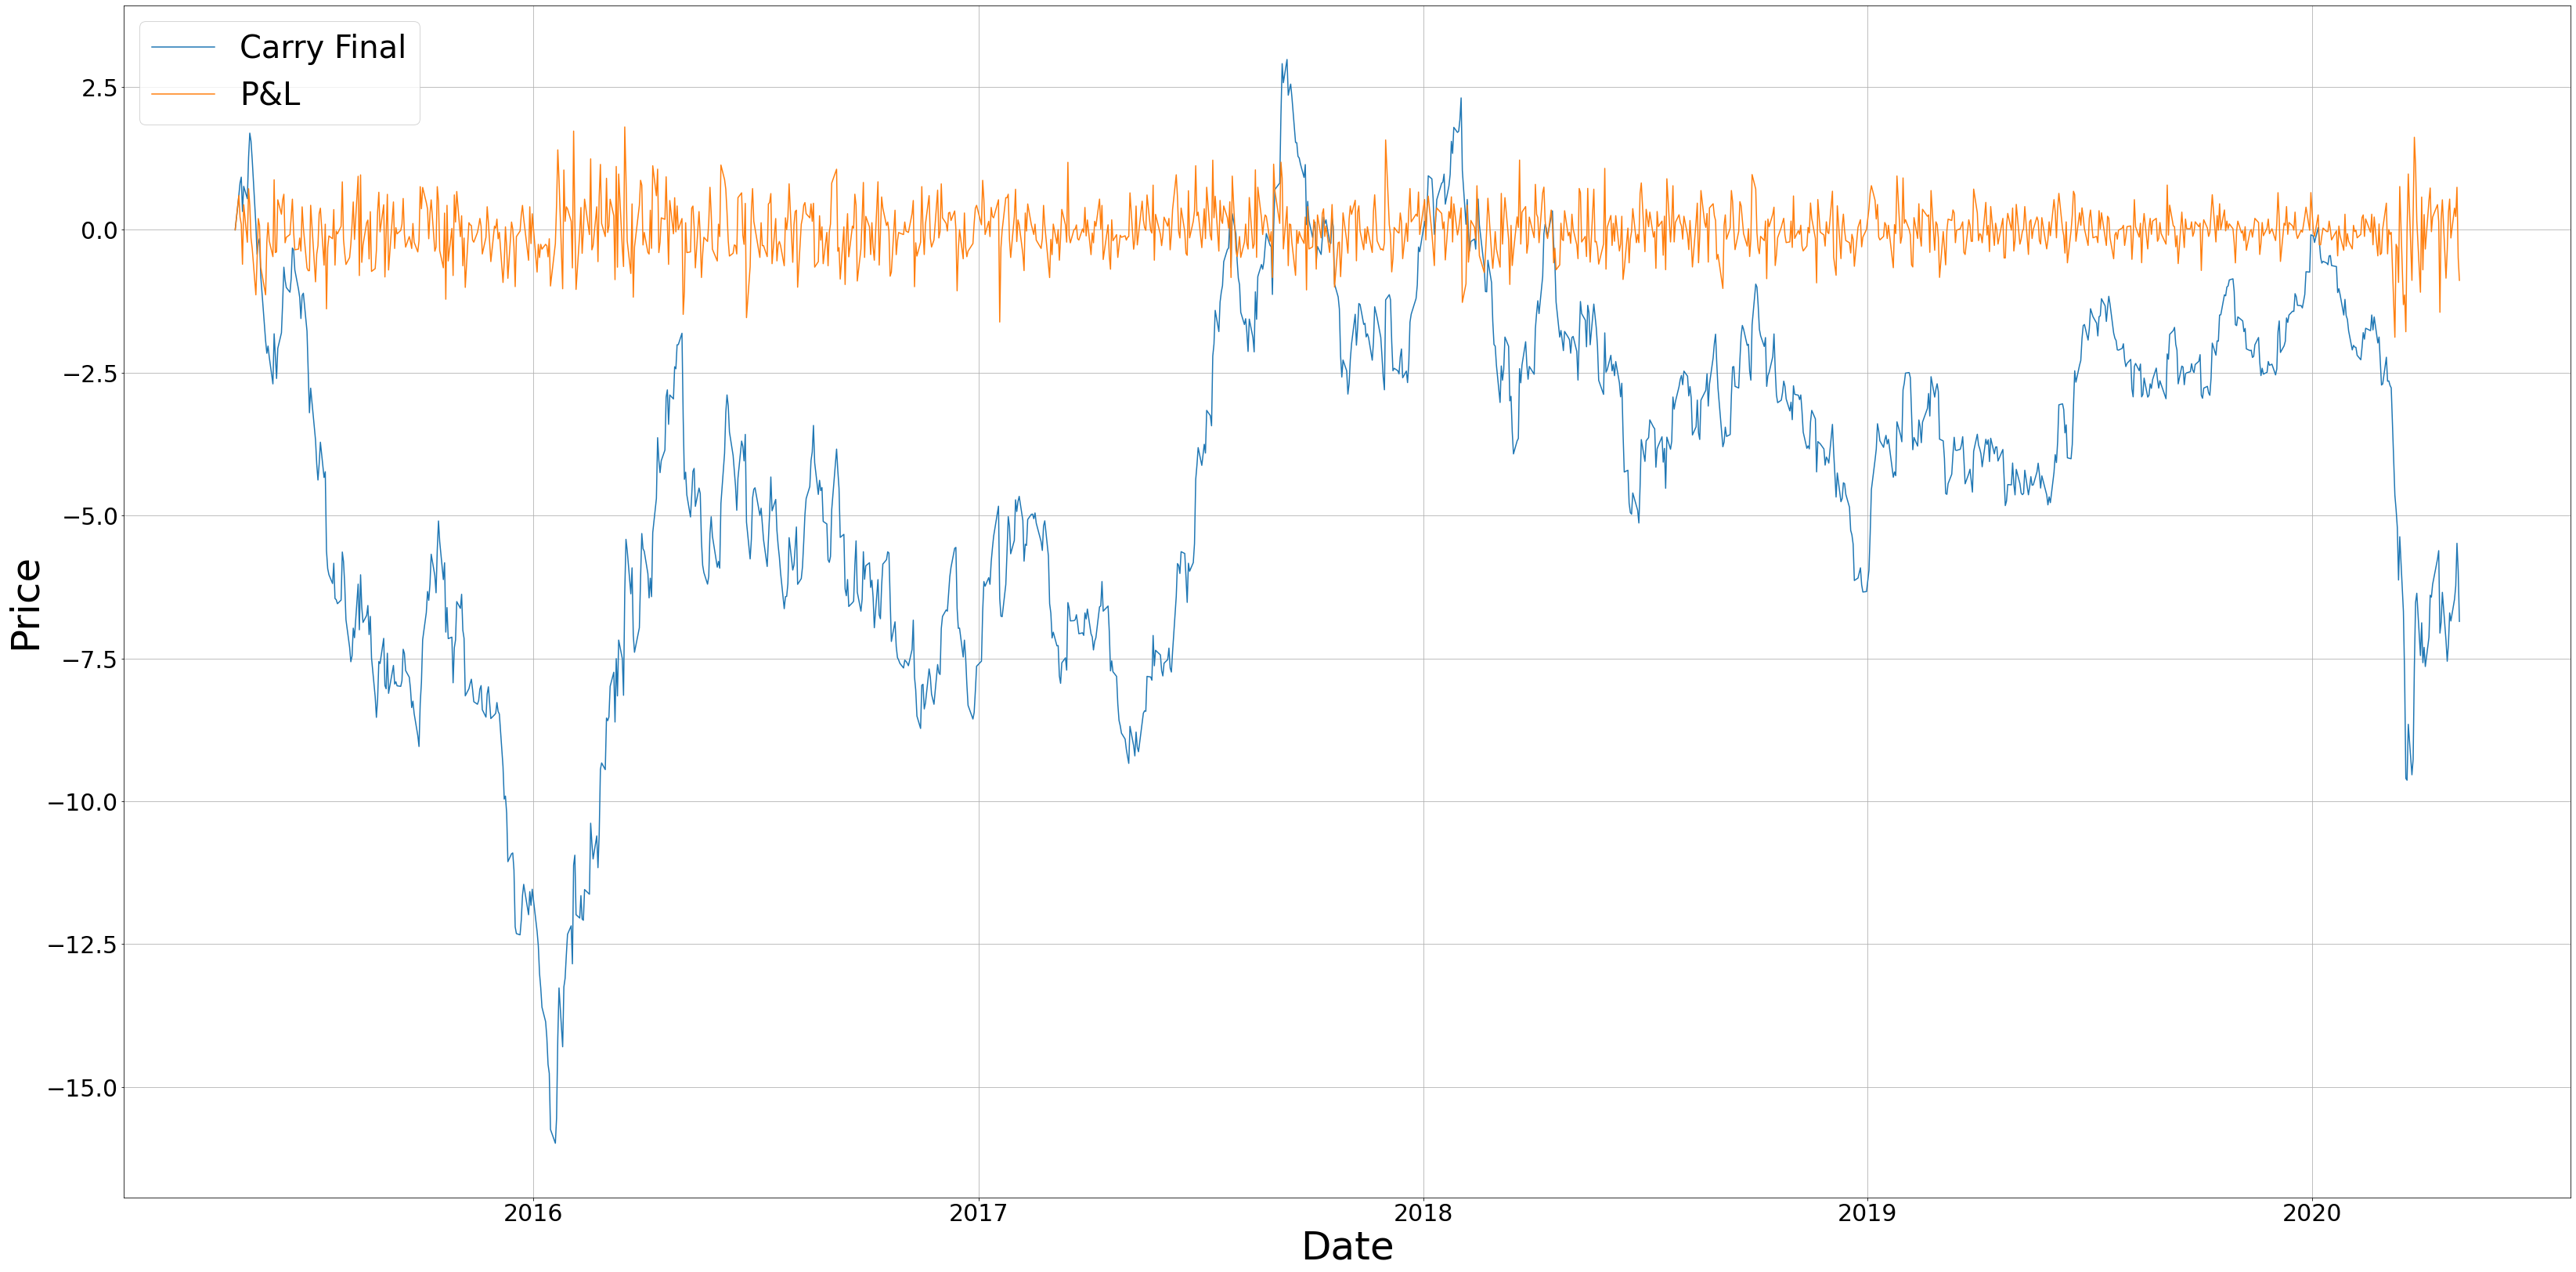

In [17]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(datos_carry['Acumulado'])
ax1 = plt.plot(datos_carry['Total P&L'])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(['Carry Final', 'P&L'],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [18]:
Estrategia_Carry.to_csv('Estrategia_Carry')